<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/Police_Activity_data_for_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Preparing the Police Activity data for analysis (Part - 1)
    </h1> 
</strong>

---

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 440, done.
remote: Counting objects: 100% (440/440), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 1811 (delta 131), reused 367 (delta 60), pack-reused 1371
Receiving objects: 100% (1811/1811), 188.37 MiB | 18.41 MiB/s, done.
Resolving deltas: 100% (623/623), done.
Checking out files: 100% (802/802), done.


__Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/21_Analyzing Police Activity with pandas/_dataset') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd) 

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/21_Analyzing Police Activity with pandas/_dataset


In [3]:
ls

police.csv  weather.csv


## $\color{green}{\textbf{Dataset_1_police.csv:}}$ 

[Stanford Open Policing Project dataset](https://openpolicing.stanford.edu/)


On a typical day in the United States, police officers make more than 50,000 traffic stops. __THE STANFORD OPEN POLICING PROJECT__ gathers, analyse, and release the records from millions of traffic stops by law enforcement agencies across the __US__.

<p align='center'>
  <a href="#">
    <img src='https://policylab.stanford.edu/images/icons/stanford-open-policing-project.png' width=500px height=300px alt="">
  </a>
</p>



## __01 Examining the dataset__

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, we'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

In [4]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [5]:
ri.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [7]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

## __02 Dropping columns__

Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the DataFrame, to make it easier for us to focus on the remaining columns.

In this exercise, we'll drop the `'county_name'` column because it only contains missing values, and we'll drop the `'state'` column because all of the traffic stops took place in one state (__Rhode Island__).

Thus, these columns can be dropped because **they contain no useful information**. 

In [8]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


## __03 Dropping rows__

When we know that a **specific column** will be **critical to our analysis**, and only a small fraction of rows are missing a value in that column, *it often makes sense to remove those rows from the dataset.*

the `'driver_gender'` column will be critical to many of our analyses. Because only a small fraction of rows are missing `'driver_gender'`, we'll drop those rows from the dataset.

In [9]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [10]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [11]:
# Examine the shape of the DataFrame
print(ri.shape)

(86536, 13)


## __04 Finding an incorrect data type__

In [12]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

$\color{green}{\textbf{Note:}} $ $\Rightarrow$ `is_arrested` should have a data type of __bool__

## __05 Fixing a data type__

- `is_arrested column` currently has the __object__ data type. 

- we have to change the data type to __bool__, which is the most suitable type for a column containing **True** and **False** values.

>Fixing the data type will enable us to use __mathematical operations__ on the `is_arrested` column that would not be possible otherwise.

In [13]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [14]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


## __06 Combining object columns (datetime format)__

- Currently, the date and time of each traffic stop are stored in separate object columns: **stop_date** and **stop_time**.

- we have to **combine** these two columns into a **single column**, and then convert it to **datetime format**. 

- This will be beneficial because unlike object columns, datetime columns provide date-based attributes that will make our analysis easier.

In [15]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


## __07 Setting the index__

The last step is to set the `stop_datetime` column as the DataFrame's **index**. By **replacing** the **default index** with a **DatetimeIndex**, this will make it easier to analyze the dataset by date and time, which will come in handy later.




In [16]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [17]:
# Examine the columns
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [18]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


--- 
<strong> 
    <h1 align='center'>Exploring the relationship between gender and policing (Part - 2)
    </h1> 
</strong>

---

## __08 Examining traffic violations__ 

Before comparing the violations being committed by each gender, we should examine the **violations** committed by all drivers to get a baseline understanding of the data.

In this exercise, we'll count the **unique values** in the `violation` column, and then separately express those counts as **proportions**.

In [19]:
ri['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [20]:
# dot method
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [21]:
# Counting unique values (2)
print(ri.violation.value_counts().sum()) 
print(ri.shape)

86536
(86536, 13)


In [22]:
48423/86536 # Speeding `55.95%`

0.5595705833410373

In [23]:
# Express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

More than half of all violations are for **speeding**, followed by other moving violations and equipment violations.

## __09 Comparing violations by gender__

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, we'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [24]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

In [25]:

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [26]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


## __10 Filtering by multiple conditions__

Which one of these commands would filter the `ri` DataFrame to only include female drivers **who were stopped for a speeding violation**?

In [27]:
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
female_and_speeding

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30 14:09:00,2015-12-30,14:09,F,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,Zone X4
2015-12-30 19:21:00,2015-12-30,19:21,F,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,Zone X1
2015-12-30 23:26:00,2015-12-30,23:26,F,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


## __11 Comparing speeding outcomes by gender__

When a driver is pulled over for `speeding`, **many people believe that gender has an impact on whether the driver will receive a ticket or a warning**. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the `stop_outcome` column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [28]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [29]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


$\color{red}{\textbf{Interpretation:}}$

>The numbers are similar for **males** and **females**: about **95%** of stops for speeding result in a ticket. Thus, __the data fails to show that gender has an impact on who gets a ticket for speeding__.

In [30]:
# Filtering by multiple conditions (1)
female = ri[ri.driver_gender == 'F']
female.shape

(23774, 13)

In [31]:
# Filtering by multiple conditions (2)
# Only includes female drivers who were arrested
female_and_arrested = ri[(ri.driver_gender == 'F') &(ri.is_arrested == True)]
female_and_arrested.shape

(669, 13)

In [32]:
# Filtering by multiple conditions (3)
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 13)

- Includes all females
- Includes all drivers who were arrested

## __12 Comparing stop outcomes for two groups__

In [33]:
# driver race --> White
white = ri[ri.driver_race == 'White']
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [34]:
# driver race --> Black
black = ri[ri.driver_race =='Black']
black.stop_outcome.value_counts(normalize=True)

Citation            0.857224
Warning             0.065120
Arrest Driver       0.054294
N/D                 0.008547
Arrest Passenger    0.008303
No Action           0.006512
Name: stop_outcome, dtype: float64

In [35]:
# driver race --> Asian
asian = ri[ri.driver_race =='Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

## __13 Does gender affect whose vehicle is searched?__

**Mean** of **Boolean Series** represents percentage of True values

In [36]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [37]:
# Taking the mean of a Boolean Series
print(ri.is_arrested.value_counts(normalize=True))
print(ri.is_arrested.mean())
print(ri.is_arrested.dtype)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64
0.0355690117407784
bool


__Comparing groups using groupby (1)__

In [38]:
# Study the arrest rate by police district
print(ri.district.unique())

# Mean
print(ri[ri.district == 'Zone K1'].is_arrested.mean())

['Zone X4' 'Zone K3' 'Zone X1' 'Zone X3' 'Zone K1' 'Zone K2']
0.024349083895853423


__Comparing groups using groupby (2)__

In [39]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [40]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

__Grouping by multiple categories__

In [41]:
ri.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [42]:
ri.groupby(['driver_gender', 'district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

## __14 Calculating the search rate__

During a traffic stop, the police officer sometimes conducts a search of the vehicle.

In this exercise, you'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

In [43]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


$\color{red}{\textbf{Interpretation:}}$

>It looks like the search rate is about __3.8%__.

### __Comparing search rates by gender__

Remember that the vehicle **search rate **across all stops is about __3.8%.__

First, we'll filter the DataFrame by gender and calculate the **search rate** for each group separately. Then, you'll perform the same calculation for both genders at once using a `.groupby()`.

__Instructions:__

- Filter the DataFrame to only include female drivers, and then calculate the search rate by taking the mean of search_conducted.

- Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.

- Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [44]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [45]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [46]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


$\color{red}{\textbf{Interpretation:}}$

>Male drivers are searched more than twice as often as female drivers. Why might this be?


## __15 Adding a second factor to the analysis__

Even though the **search rate** for **males is much higher than for females**, *it's possible that the difference is mostly due to a second factor.*

>For example, we might **hypothesize** that **the search rate varies by violation type**, and the difference in search rate between males and females is because they tend to commit different violations.

we can test this hypothesis by examining the **search rate** for **each combination of gender and violation**. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

__Instructions__

- Use a `.groupby()` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

- Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [47]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [48]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

$\color{red}{\textbf{Interpretation:}}$

>For all types of violations, the search rate is higher for males than for females, disproving our hypothesis

## __16 Does gender affect who is frisked during a search?__

In [49]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

`.value_counts()`
__excludes missing
values by default__


In [50]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t


- `dropna=False`
 **displays missing
values**

**Examining the search types**

In [51]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

- Multiple values are separated by commas.

- 219 searches in which **"Inventory"** was the only search type.

- Locate **"Inventory"** among multiple search types.

__Searching for a string (1)__

In [52]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

- `str.contains()` returns
    - True if string is found
    - False if not found.

- `na=False` returns `False` when it ,finds a missing value

__Searching for a string (2)__

In [53]:
ri.inventory.dtype

dtype('bool')

**True** means inventory was done, **False** means it was not

In [54]:
ri.inventory.sum()

441

__Calculating the inventory rate__

In [55]:
ri.inventory.mean()

0.0050961449570121106

**0.5%** of all traffic stops resulted in an inventory.

In [56]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

__13.3% of searches included an inventory__

## __17 Counting protective frisks__

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

__Instructions__

- Count the `search_type` values in the `ri` DataFrame to see how many times "Protective Frisk" was the only search type.

- Create a new column, `frisk`, that is `True` if search_type contains the string "Protective Frisk" and `False` otherwise.

- Check the data type of `frisk` to confirm that it's a Boolean Series.

- Take the sum of `frisk` to count the total number of frisks.

In [57]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

$\color{red}{\textbf{Interpretation:}}$

>It looks like there were **303 drivers** who were **frisked**. Next, you'll examine whether gender affects who is frisked.

## __18 Comparing frisk rates by gender__

In this exercise, we'll compare the rates at which **female** and **male** drivers are **frisked during a search**.

>Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

__Instructions__

- Create a DataFrame, **searched**, that only contains rows in which `search_conducted` is `True`.

- Take the mean of the `frisk` column to find out what percentage of searches included a frisk.

- Calculate the frisk rate for each gender using a `.groupby()`.

In [58]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


$\color{red}{\textbf{Interpretation:}}$

>The **frisk rate** is **higher for males than for females**, though we **can't** conclude that this difference is caused by the driver's gender.

--- 
<strong> 
    <h1 align='center'>Does time of day affect arrest rate?(Part - 3)
    </h1> 
</strong>

---

## __19 Calculating the hourly arrest rate__

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the **ri** DataFrame. Then, you'll calculate the hourly arrest rate by using the **hour** attribute of the index. The **hour** ranges from 0 to 23, in which:

- *0 = midnight*
- *12 = noon*
- *23 = 11 PM*

__Instructions__

- Take the mean of the `is_arrested` column to calculate the overall arrest rate.

- Group by the `hour` attribute of the DataFrame index to calculate the hourly arrest rate.

- Save the hourly arrest rate Series as a new object, `hourly_arrest_rate`.

In [59]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


## __20 Plotting the hourly arrest rate__

In this exercise, we'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

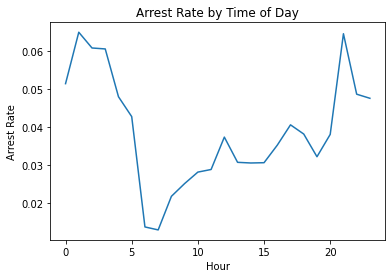

In [60]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

## __21 Plotting drug-related stops__

__Are drug-related
stops on the rise?__

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

__Instructions__

- Calculate the annual rate of drug-related stops by resampling the `drugs_related_stop` column (on the `'A'` frequency) and taking the mean.

- Save the annual drug rate Series as a new object, `annual_drug_rate`.

- Create a line plot of `annual_drug_rate` using the `.plot()` method.

- Display the plot using the `.show()` function.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


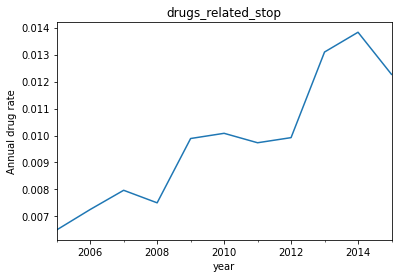

In [61]:
# Calculate the annual rate of drug-related stops
# resampling `drugs_related_stop` represented by 'A' for Annual rate
# & chain with mean at end
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.xlabel('year')
plt.ylabel('Annual drug rate')
plt.title('drugs_related_stop')
plt.show()

**Resampling**
 
Resampling is when we change the frequncy of our __time-series__ obervation.

Most commonly used time series frequency are –
- **W** : weekly frequency
- **M** : month end frequency
- **SM** : semi-month end frequency -(15th and end of month)
- **Q** : quarter end frequency
- **A** : Annual

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. 

It is a Convenience method for **frequency conversion** and resampling of **time serie**s. Object must have a datetime-like index (**DatetimeIndex**, **PeriodIndex**, or **TimedeltaIndex**), or pass datetime-like values to the on or level keyword.

## __22 Comparing drug and search rates__

>From the above plot its evident that rate of `drug-related` stops increased significantly between **2005** and **2015**. 

we might **hypothesize** that the **rate of vehicle searches** was also **increasing**, which would have led to an **increase** in **drug-related stops** even if more drivers were not carrying drugs.

You can test this **hypothesis** by calculating the **annual search rate**, and then plotting it against the **annual drug rate**.

*If the hypothesis is true, then you'll see both rates increasing over time.*

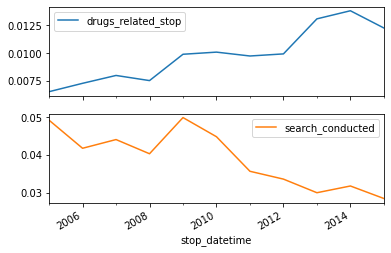

In [62]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

$\color{red}{\textbf{Interpretation:}}$

>The rate of **drug-related** stops **increased** even though the **search rate decreased**, disproving our hypothesis

## __23 What violations are caught in each district?__

In [63]:
# Computing a frequency table
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [64]:
# Driver Asian and Gender is Female 
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

In [65]:
# Selecting a DataFrame slice
table1 = table.loc['Asian':'Hispanic']
table1

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


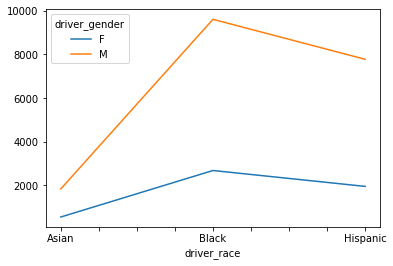

In [66]:
# Line Plot
table1.plot()
plt.show()

**line plot** is not appropriate in this case because it implies a change in time along the **x-axis**, whereas the **x-axis** actually represents **three** distinct categories.

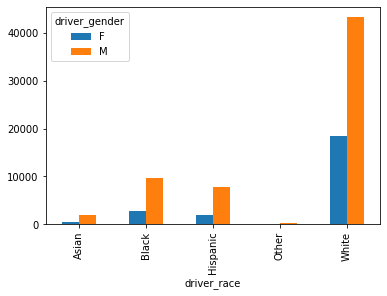

In [67]:
# Creating a bar plot
table.plot(kind='bar')
plt.show()

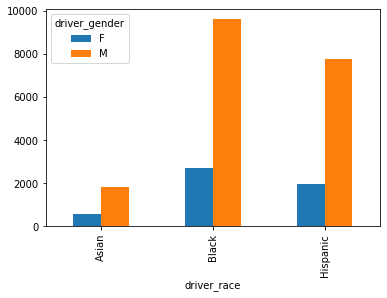

In [68]:
# Creating a bar plot
table1.plot(kind='bar')
plt.show()

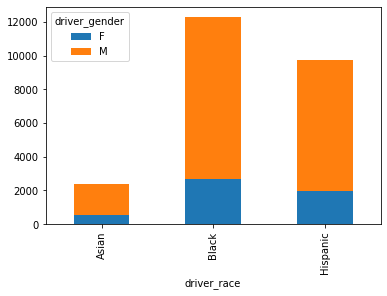

In [69]:
# Stacking the bars for table1
table1.plot(kind='bar', stacked=True)
plt.show()

__Tallying violations by district__

The state of Rhode Island is broken into **six police districts**, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, we'll create a **frequency table** to determine **how many violations of each type took place in each of the six zones**. Then, you'll filter the table to focus on the `"K" zones`, which you'll examine further in the next exercise.

__Instructions:__

- Create a frequency table from the `ri` DataFrame's `district` and `violation` columns using the `pd.crosstab()` function.

- Save the frequency table as a new object, `all_zones`.

- Select rows `'Zone K1'` through `'Zone K3'` from `all_zones` using the `.loc[]` accessor.
Save the smaller table as a new object, `k_zones`.

In [70]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]
violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


## __24 Plotting violations by district__

we've created a frequency table focused on the `"K"` zones, **visualize** the data to help you compare what **violations** are being caught in each zone.

>**First** we'll create a **bar plot**, which is an appropriate plot type since we're **comparing categorical data**. 

>Then we'll create a **stacked bar** plot in order to get a slightly different look at the data to find which plot is more insightful?

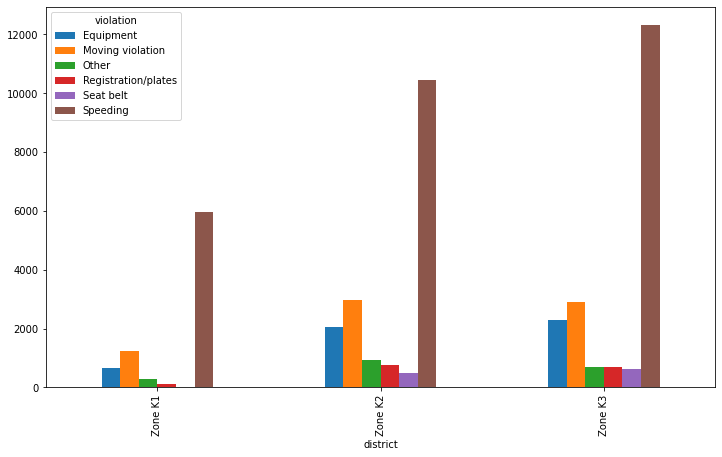

In [71]:
# Creating a bar plot
k_zones.plot(kind='bar', figsize=(12, 7))

# Display the plot
plt.show()

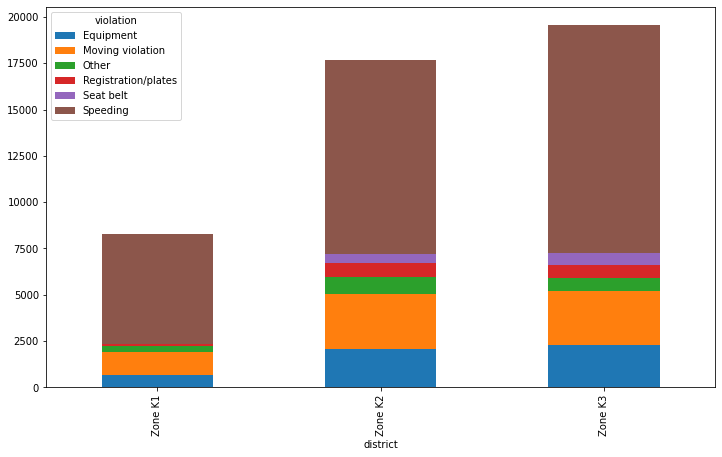

In [72]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True, figsize=(12, 7))

# Display the plot
plt.show()

The vast majority of traffic stops in **Zone K1** are for speeding, and **Zones K2** and **K3** are remarkably similar to one another in terms of violations.

## __25 Converting stop durations to numbers__

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

- Convert `'0-15 Min'` to `8`
- Convert `'16-30 Min'` to `23`
- Convert `'30+ Min'` to `45`

$\color{red}{\textbf{Note:}}$

>`astype()` method to convert strings to numbers or Booleans. 

However, `astype()` only works when pandas can infer how the conversion should be done, and that's not the case here.

In [73]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, 
            '16-30 Min':23,
            '30+ Min':45
            }

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


## __26 Plotting stop length__

>If we were **stopped** for a particular violation, how long might we expect to be detained?

In this exercise, we'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the `violation` column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

__Instructions__

- For each value in the ri DataFrame's **violation_raw** column, calculate the mean number of **stop_minutes** that a driver is detained.

- Save the resulting Series as a new object, **stop_length**.

- Sort **stop_length** by its values, and then visualize it using a horizontal bar plot.

- Display the plot.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


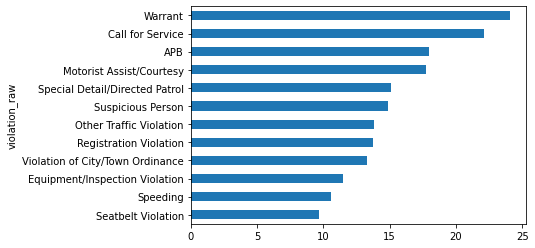

In [74]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

__Calculating the search rate__

- **Visualizing** how often searches were done after each **violation** type

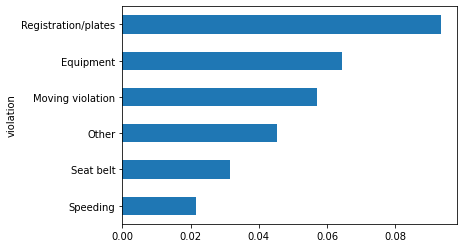

In [75]:
search_rate = ri.groupby('violation').search_conducted.mean()
search_rate.sort_values().plot(kind='barh')
plt.show()

--- 
<strong> 
    <h1 align='center'>Analyzing the effect of weather on policing(Part - 4)
    </h1> 
</strong>

---

In [76]:
ls

police.csv  weather.csv


## $\color{green}{\textbf{Dataset_2_weather.csv:}}$ 

[National Centers for Environmental Information](https://www.ncei.noaa.gov/)

<p align=''center>
    <a href='#'><img src='https://www.climatecommunication.org/wp-content/uploads/2013/04/Screen-Shot-2016-01-29-at-10.52.21-AM.png'></a>
</p>

In [77]:
# Import the pandas library as pd
import pandas as pd

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# Examine the head of the DataFrame
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


- __TAVG , TMIN , TMAX__ : Temperature
- __AWND , WSF2 :__ Wind speed
- __WT01 ... WT22 :__ Bad weather conditions

__The difference between isnull () and isna ()?__

`.isnull()` and `isna()` are the same functions (an alias), so we can choose either one. `df.isnull().sum()` or `df.isna().sum()`.

Finding which index (or row number) contains missing values can be done analogously to the previous example, simply by adding axis=1. 

In [78]:
# Count the number of missing values in each column
print(weather.isnull().sum())

# Columns
print(weather.columns)

# Shape
print(weather.shape)

STATION       0
DATE          0
TAVG       2800
TMIN          0
TMAX          0
AWND          0
WSF2          0
WT01       2250
WT02       3796
WT03       3793
WT04       3900
WT05       3657
WT06       3992
WT07       3938
WT08       3613
WT09       3948
WT10       4015
WT11       4016
WT13       2842
WT14       3442
WT15       4011
WT16       2691
WT17       4005
WT18       3672
WT19       4013
WT21       3999
WT22       3985
dtype: int64
Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')
(4017, 27)


## __27 Plotting the temperature__

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


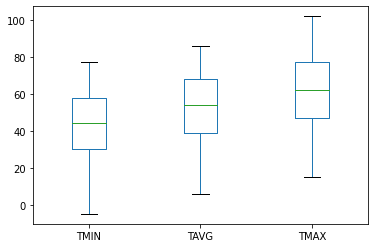

In [79]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

__Examining the wind speed__


   AWND  WSF2
0  8.95  25.1
1  9.40  14.1
2  6.93  17.0
3  6.93  16.1
4  7.83  17.0
              AWND         WSF2
count  4017.000000  4017.000000
mean      8.593707    19.274782
std       3.364601     5.623866
min       0.220000     4.900000
25%       6.260000    15.000000
50%       8.050000    17.900000
75%      10.290000    21.900000
max      26.840000    48.100000


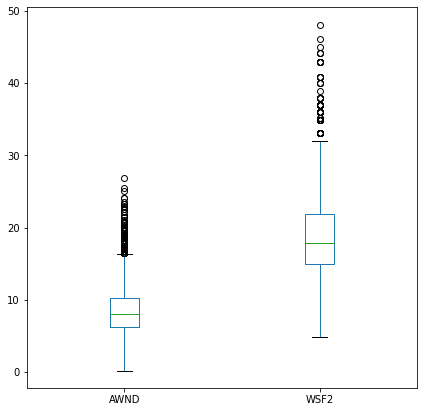

<Figure size 432x288 with 0 Axes>

In [80]:
print(weather[['AWND', 'WSF2']].head())
print(weather[['AWND', 'WSF2']].describe())

# Creating a box plot
weather[['AWND', 'WSF2']].plot(kind='box', figsize=(7, 7))
plt.figure()
plt.show()

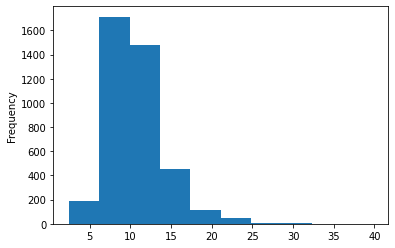

In [81]:
# Creating a histogram (1)
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

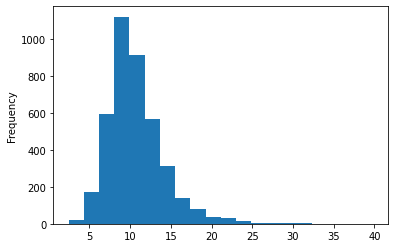

In [82]:
# Creating a histogram (2)
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

## __28 Plotting the temperature difference__




count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


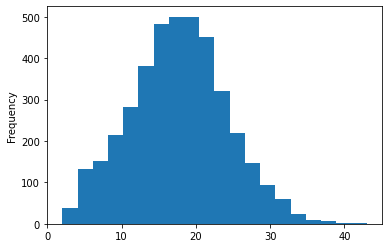

In [83]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

## __29 Categorizing the weather__

In [84]:
# Printing the shape and columns
print(weather.shape)
print(weather.columns)

(4017, 29)
Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF', 'TDIFF'],
      dtype='object')


In [85]:
# Selecting a DataFrame slice
temp = weather.loc[:, 'TAVG':'TMAX']
print(temp.shape)
print(temp.columns)

(4017, 3)
Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')


__Mapping one set of values to another__

In [86]:
print(ri.stop_duration.unique())

mapping = {'0-15 Min':'short',
           '16-30 Min':'medium',
           '30+ Min':'long'
           }

ri['stop_length'] = ri.stop_duration.map(mapping)
print(ri.stop_length.dtype)
print(ri.stop_length.unique())

['0-15 Min' '16-30 Min' '30+ Min']
object
['short' 'medium' 'long']


- Category type stores the data more efficiently.
- Allows you to specify a logical order for the categories.

In [87]:
ri.stop_length.memory_usage(deep=True)

6068041

`pandas.DataFrame.memory_usage` __function__

Return the **memory usage** of each column in bytes.

- The **memory usage** can optionally include the contribution of the **index** and **elements** of object dtype.

- `deep` bool, __default False__
If **True**, introspect the data deeply by interrogating object dtypes for system-level memory consumption, and include it in the returned values.


__Changing data type from object to category__

In [88]:
from pandas.api.types import CategoricalDtype 

# Changing data type from object to category
cats = ['short', 'medium', 'long']

cat_type = CategoricalDtype(categories=cats, ordered=True)

ri['stop_length'] = ri['stop_length'].astype(cat_type)

print(ri.stop_length.memory_usage(deep=True))

779090


In [89]:
# Using ordered categories
print(ri.stop_length.value_counts())

short     69577
medium    13740
long       3219
Name: stop_length, dtype: int64


In [90]:
ri[ri.stop_length > 'short'].shape

(16959, 17)

In [91]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

## __30 Counting bad weather conditions__

The `weather` DataFrame contains 20 columns that start with `'WT'`, each of which represents a bad weather condition. For example:

- `WT05` indicates "Hail"
- `WT11` indicates "High or damaging winds"
- `WT17` indicates "Freezing rain"

For every row in the dataset, each `WT` column contains either a 1 (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of `1` values in each row.

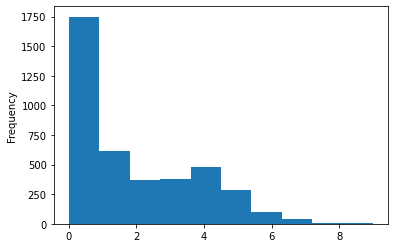

In [92]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

$\color{red}{\textbf{Interpretation:}}$

>It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

## __31 Rating the weather conditions__

In the previous exercise, we have counted the number of bad weather conditions each day. In this exercise, we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert 0 to `'good'`
- Convert 1 through 4 to `'bad'`
- Convert 5 through 9 to `'worse'`


In [93]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good',
           1:'bad', 2:'bad', 3:'bad', 4:'bad', 
           5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


This rating system should make the weather condition data easier to understand.

## __32 Changing the data type to category__

Since the `rating` column only has a few possible values, we have to change its **data type to category** in order to store the data more efficiently & then specify a logical order for the categories.

In [94]:
from pandas.api.types import CategoricalDtype 

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
cat_types= CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather['rating'].astype(cat_types)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [95]:
print(weather.rating.memory_usage(deep=True))

4408


In [96]:
# Using ordered categories
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


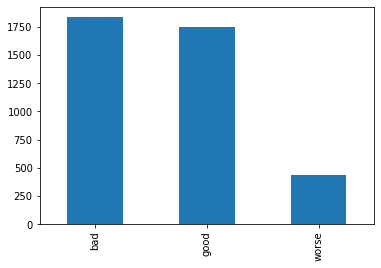

In [97]:
weather.rating.value_counts().plot(kind='bar')
plt.show()

## __33 Merging datasets(Preparing the DataFrames)__

In this exercise, we'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the `ri` DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.

2. With the `weather` DataFrame, you'll select the `DATE` and `rating` columns and put them in a new DataFrame.

__Instructions__

- Reset the index of the ri DataFrame.

- Examine the head of ri to verify that `stop_datetime` is now a DataFrame column, and the index is now the default integer index.

- Create a new DataFrame named `weather_rating` that contains only the `DATE` and rating columns from the weather DataFrame.

- Examine the head of `weather_rating` to verify that it contains the proper columns.

In [98]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time  ...  frisk stop_minutes stop_length
0 2005-01-04 12:55:00  2005-01-04     12:55  ...  False            8       short
1 2005-01-23 23:15:00  2005-01-23     23:15  ...  False            8       short
2 2005-02-17 04:15:00  2005-02-17     04:15  ...  False            8       short
3 2005-02-20 17:15:00  2005-02-20     17:15  ...  False           23      medium
4 2005-02-24 01:20:00  2005-02-24     01:20  ...  False            8       short

[5 rows x 18 columns]
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


The **ri** and **weather_rating** DataFrames are now ready to be **merged**.

__Merging the DataFrames__

In this exercise, we'll merge the `ri` and `weather_rating` DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the `stop_date` column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.


In [99]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)
(86536, 20)


## __34 Does weather affect the arrest rate?__

In [100]:
# Driver gender and vehicle searches
print(ri.search_conducted.mean())
print(ri.groupby('driver_gender').search_conducted.mean())

0.0382153092354627
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [101]:
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [102]:
print(type(search_rate))
print(type(search_rate.index))

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.multi.MultiIndex'>


In [103]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [104]:
search_rate.loc['Equipment', 'M']

0.07149643705463182

In [105]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [106]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

__Converting a multi-indexed Series to a DataFrame__

In [107]:
ri.pivot_table(index='violation',
               columns='driver_gender',
               values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


### __Comparing arrest rates by weather rating__

Do police officers arrest drivers more often when the weather is bad? Find out below!

- First, you'll calculate the overall arrest rate.

- Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.

- Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, `good < bad < worse`, they will be sorted that way in the results.

__Calculate the overall arrest rate by taking the mean of the `is_arrested` Series__

In [108]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


__Calculate the arrest rate for each weather `rating` using a `.groupby()`.__

In [109]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


__Calculate the arrest rate for each combination of `violation` and `rating`. How do the arrest rates differ by group?__

In [110]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


$\color{red}{\textbf{Interpretation:}}$

>The arrest rate **increases as the weather gets worse**, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result

## __35 Selecting from a multi-indexed Series__

The output of a single `.groupby()` operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

- The outer index level is like the DataFrame rows.
- The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the `.loc[]` accessor.

In [111]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


## __36 Reshaping the arrest rate data__

In this exercise, we'll the `arrest_rate` Series into a DataFrame. This is a useful step when working with any **multi-indexed Series**, since it enables us to access the *full range of DataFrame methods*.

Then, we'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [112]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', 
                             columns='rating', 
                             values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


---

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>

---